 ### Build the feature vector


# The Decision Tree on the Churn Dataset in Spark

In [1]:
from pyspark.sql import DataFrameReader
from pyspark.sql import SparkSession
from pyspark.ml.feature import IndexToString, StringIndexer, VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import DecisionTreeClassifier
from helpers.helper_functions import translate_to_file_string
#Own imports
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix




## Select the Data file 

In [2]:
inputFile = translate_to_file_string("../data/data.csv")

## Create the Spark Session 

In [3]:
#create a SparkSession
spark = (SparkSession
       .builder
       .appName("DataVisualization")
       .getOrCreate())
# create a DataFrame using an ifered Schema 
df = spark.read.option("header", "true") \
       .option("inferSchema", "true") \
       .option("delimiter", ";") \
       .csv(inputFile)   

In [4]:
# Print dataset examples
HTML(df.toPandas().head(6).to_html())

### Visualizations

#### Boxplots

In [5]:
#Confusing print
#plt = df.toPandas().boxplot(sym='r+', column=["Tenure","Monthly Charges", "Total Charges"] , figsize=(10,15))

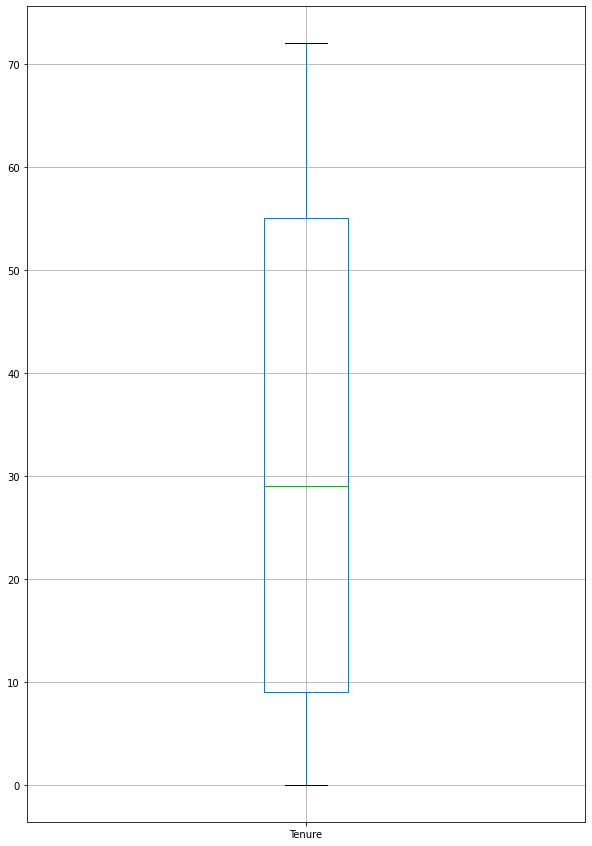

In [6]:
plt = df.toPandas().boxplot(sym='r+', column="Tenure", figsize=(10,15))

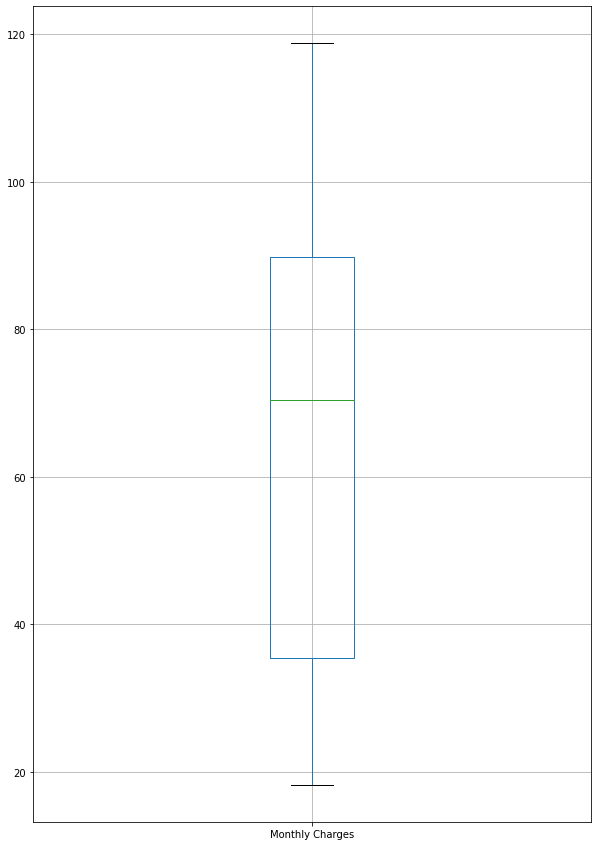

In [7]:
plt = df.toPandas().boxplot(sym='r+', column="Monthly Charges", figsize=(10,15))

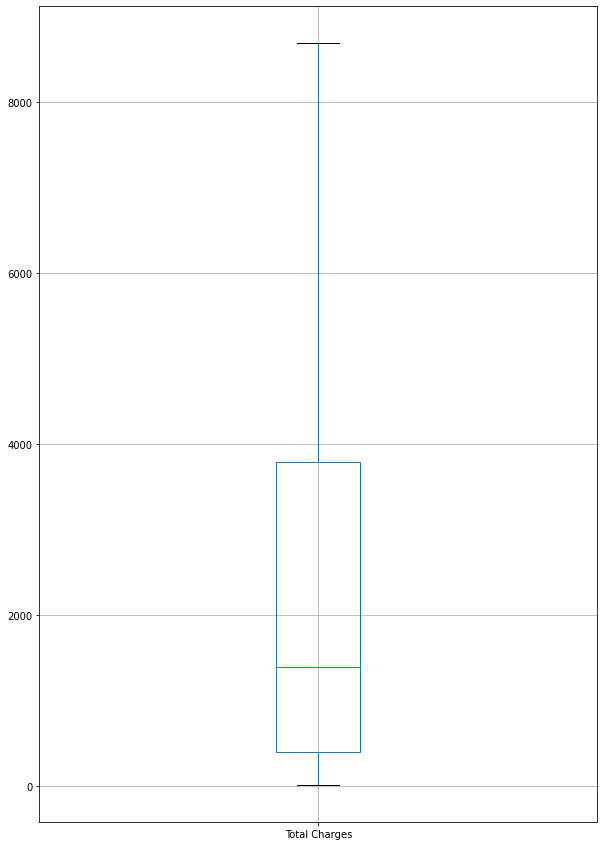

In [8]:
plt = df.toPandas().boxplot(sym='r+', column="Total Charges", figsize=(10,15))

#### Scatter Plot

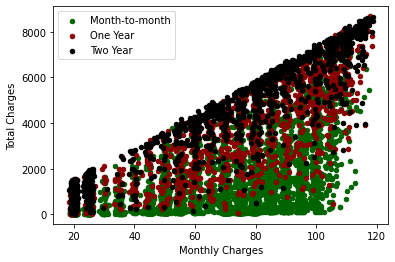

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
ax = df.filter(df.Contract == "Month-to-month" ).toPandas().plot.scatter(x='Monthly Charges', y='Total Charges', color='DarkGreen', label='Month-to-month')
df.filter(df.Contract == "One year").toPandas().plot.scatter(x='Monthly Charges', y='Total Charges', color='DarkRed', label='One Year', ax=ax)
df.filter(df.Contract == "Two year").toPandas().plot.scatter(x='Monthly Charges', y='Total Charges', color='Black', label='Two Year', ax=ax)
plt.show()

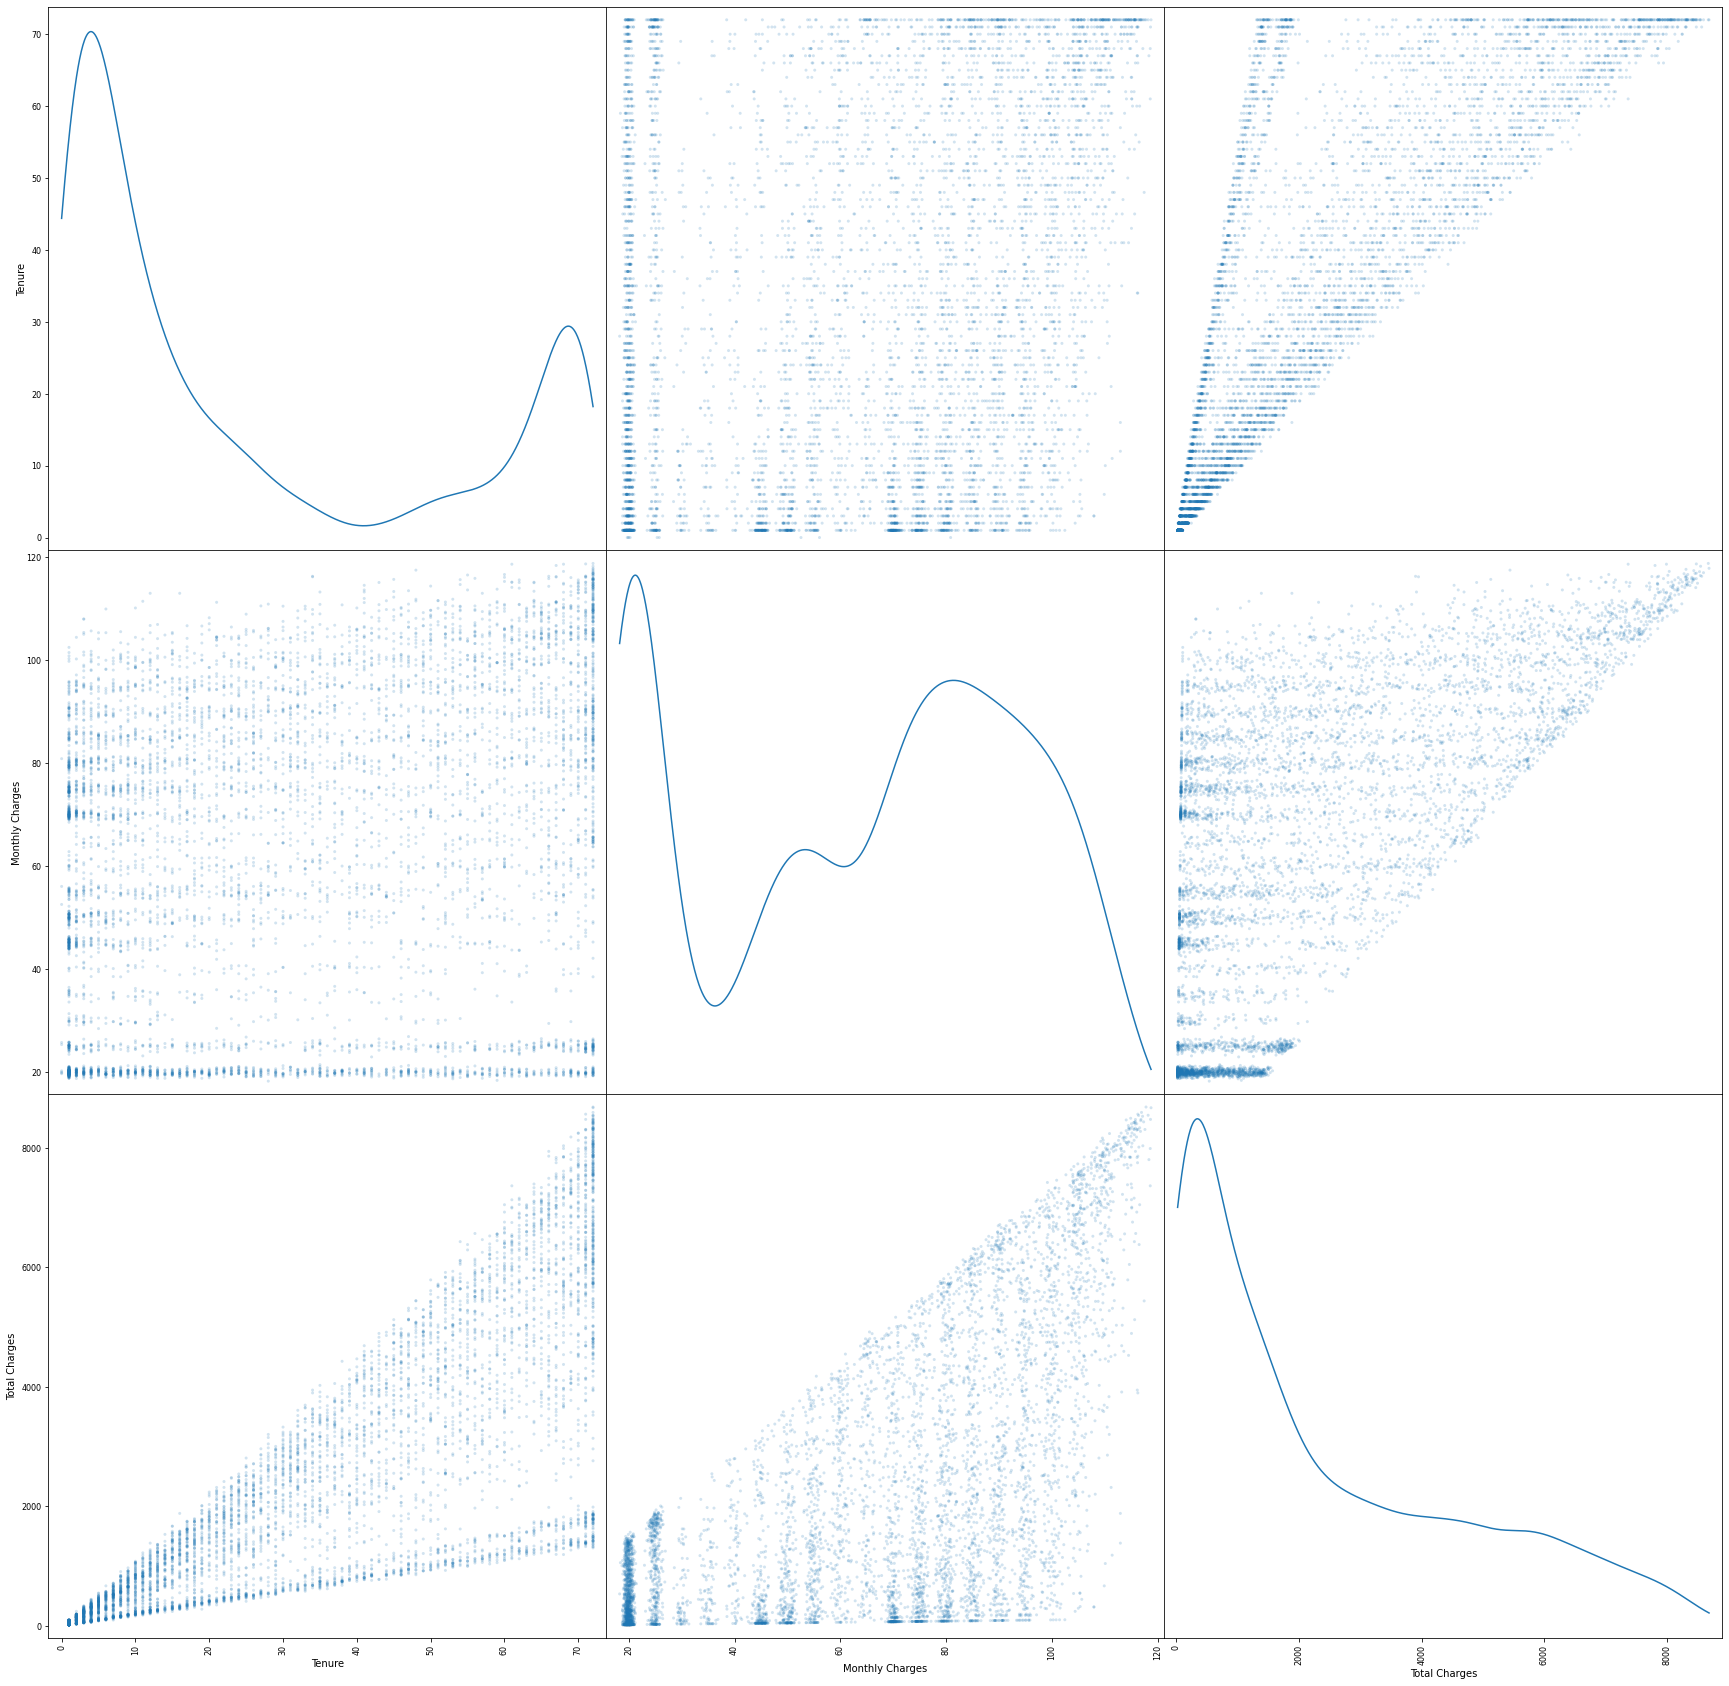

In [10]:
scatter_matrix(df.select("Tenure", "Monthly Charges", "Total Charges").toPandas(), alpha=0.2, figsize=(30, 30), diagonal='kde')
plt.show()

#### Bar graph

<AxesSubplot:xlabel='Gender'>

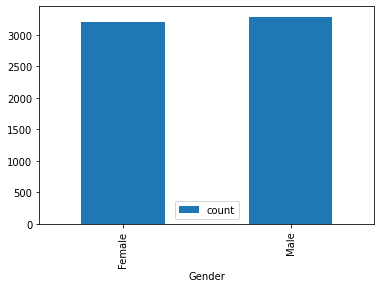

In [11]:
df_contracts = df.groupBy("Gender").count()
df_contracts.toPandas().plot.bar(x="Gender")

<AxesSubplot:xlabel='Senior Citizen'>

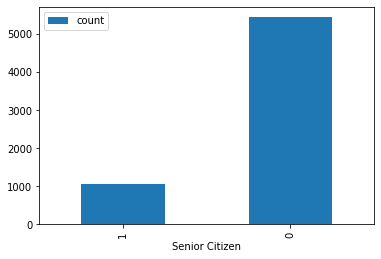

In [12]:
df_contracts = df.groupBy("Senior Citizen").count()
df_contracts.toPandas().plot.bar(x="Senior Citizen")

<AxesSubplot:xlabel='Partner'>

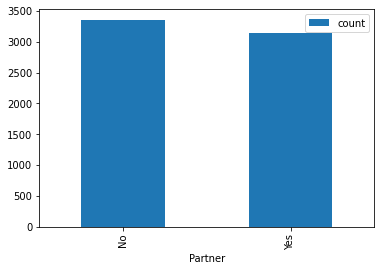

In [13]:
df_contracts = df.groupBy("Partner").count()
df_contracts.toPandas().plot.bar(x="Partner")

<AxesSubplot:xlabel='Dependents'>

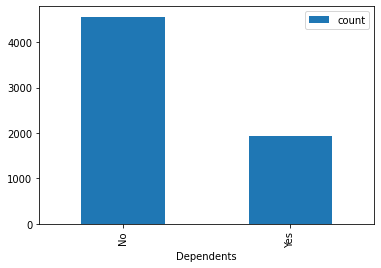

In [14]:
df_contracts = df.groupBy("Dependents").count()
df_contracts.toPandas().plot.bar(x="Dependents")

<AxesSubplot:xlabel='Tenure'>

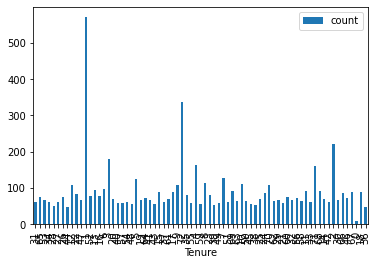

In [15]:
df_contracts = df.groupBy("Tenure").count()
df_contracts.toPandas().plot.bar(x="Tenure")

<AxesSubplot:xlabel='Multiple Lines'>

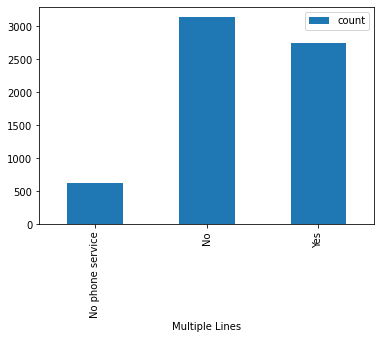

In [16]:
df_contracts = df.groupBy("Multiple Lines").count()
df_contracts.toPandas().plot.bar(x="Multiple Lines")

<AxesSubplot:xlabel='Internet Service'>

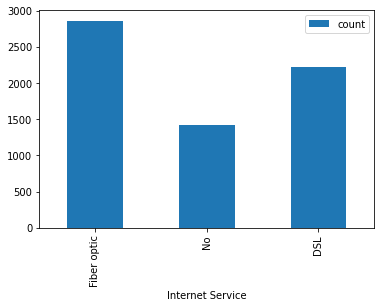

In [17]:
df_contracts = df.groupBy("Internet Service").count()
df_contracts.toPandas().plot.bar(x="Internet Service")

<AxesSubplot:xlabel='Online Security'>

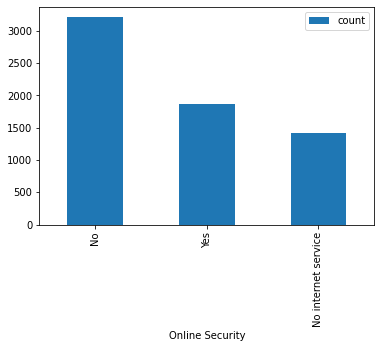

In [18]:
df_contracts = df.groupBy("Online Security").count()
df_contracts.toPandas().plot.bar(x="Online Security")

<AxesSubplot:xlabel='Online Backup'>

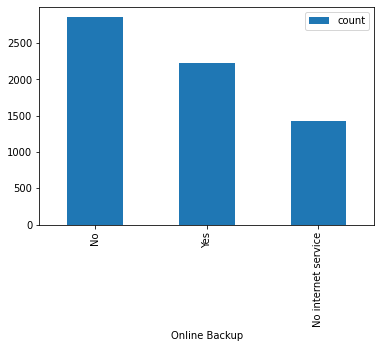

In [19]:
df_contracts = df.groupBy("Online Backup").count()
df_contracts.toPandas().plot.bar(x="Online Backup")

<AxesSubplot:xlabel='Device Protection'>

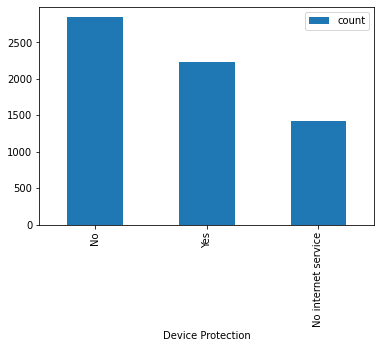

In [20]:
df_contracts = df.groupBy("Device Protection").count()
df_contracts.toPandas().plot.bar(x="Device Protection")

<AxesSubplot:xlabel='Tech Support'>

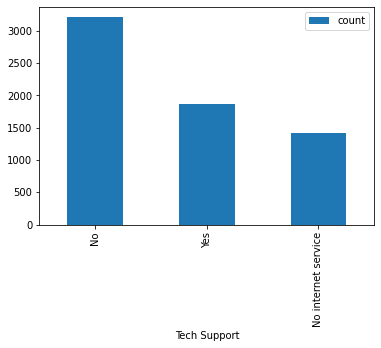

In [21]:
df_contracts = df.groupBy("Tech Support").count()
df_contracts.toPandas().plot.bar(x="Tech Support")

<AxesSubplot:xlabel='Streaming Movies'>

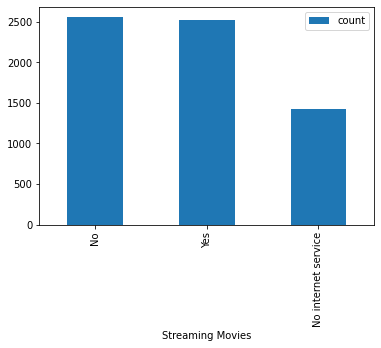

In [22]:
df_contracts = df.groupBy("Streaming Movies").count()
df_contracts.toPandas().plot.bar(x="Streaming Movies")

<AxesSubplot:xlabel='Paperless Billing'>

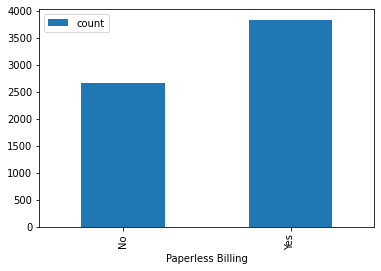

In [23]:
df_contracts = df.groupBy("Paperless Billing").count()
df_contracts.toPandas().plot.bar(x="Paperless Billing")

<AxesSubplot:xlabel='Payment Method'>

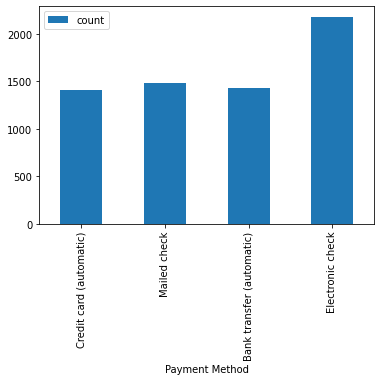

In [24]:
df_contracts = df.groupBy("Payment Method").count()
df_contracts.toPandas().plot.bar(x="Payment Method")

<AxesSubplot:xlabel='Contract'>

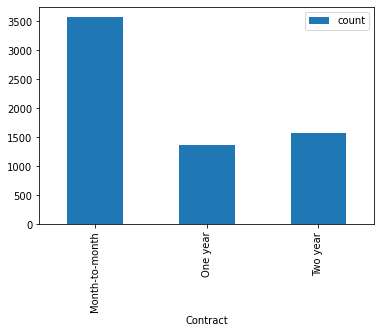

In [25]:
df_contracts = df.groupBy("Contract").count()
df_contracts.toPandas().plot.bar(x="Contract")

In [26]:
spark.stop()